# TXPipe - CLMM Data Preparation

This notebook runs and explores two pipelines that generate the weighted, calibrated, per-cluster background shear catalogs as inputs to CLMM.  The instructions for running this on IN2P3 and on NERSC will differ.

On IN2P3 -- before starting you will need to:
- set up the TXPipe environment at CC-IN2p3 using the command 
`source /pbs/throng/lsst/users/jzuntz/txpipe-environments/setup-txpipe`
- clone the TXPipe repository somewhere. Note, the recommendation is for big data files to live in the sps folder, but not code.  You will want additional data (not tracked by git) to live in sps, and to softlink to the data directory in TXPipe. There are potentially big data files in the the data folder inside TXPipe, but these should ideally be put  in the SPS space since you may generate large files.
- downloaded the two input catalogs: [1 square degree](https://portal.nersc.gov/cfs/lsst/txpipe/data/example.tar.gz) and [20 square degrees](https://portal.nersc.gov/cfs/lsst/txpipe/data/cosmodc2-20deg2.tar.gz) and unzipped them in your TXPipe clone directory.

On NERSC -- make sure you work through the installation and data downloading instructions on the README:
- [Install TXPipe](https://github.com/LSSTDESC/TXPipe#installing)
- [Download](https://github.com/LSSTDESC/TXPipe#running) example data

You should then be able to execute the cells below in the **1 deg$^2$ Sample** section with the TXPipe kernel in NERSC.

In [1]:
import os
from pprint import pprint
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import ceci

/sps/lsst/users/ebarroso/conda_envs/txpipe_clp/lib/python3.10/site-packages/ceci/__init__.py:12: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound


# 1 deg$^2$ Sample

First we will do some runs on the 1 deg^2 example data set with around 80k galaxies. This is small enough that we can do it all in jupyter.

The data set, which is based on CosmoDC2, contains pre-computed photo-z and and contains a RedMapper cluster catalog for the field.

We will clone our own copy of the TXPipe directory, and run this notebook from there.  **Please change `my_txpipe_dir`** to your own version of the path when running this:

In [2]:
my_txpipe_dir = "/sps/lsst/users/ebarroso/TXPipe"
os.chdir(my_txpipe_dir)

import txpipe

Now we make an output directory for everything, if it doesn't exist already.

In [3]:
os.makedirs("data/example/outputs_metadetect", exist_ok=True)

In [4]:
if not os.path.exists("data/example/inputs/metadetect_shear_catalog.hdf5"):
    raise RuntimeError("Download and extract the sample data file to continue")

---

## WL sample selection

Our first step is the WL sample selection. This does both selection and tomography. The latter is not used here.

In [5]:
step1 = txpipe.TXSourceSelectorMetadetect.make_stage(
    # This file is the input metadetect shear catalog
    shear_catalog="data/example/inputs/metadetect_shear_catalog.hdf5",
    # This is an input training set for the tomographic selection
    calibration_table="data/example/inputs/sample_cosmodc2_w10year_errors.dat",

    # This contains all the options for this stage. You can override them here
    # manually too.
    config="examples/metadetect/config.yml",

    # This is the output file for this stage
    shear_tomography_catalog="data/example/outputs_metadetect/shear_tomography_catalog.hdf5"
)

This step will first train a classifier to select objects into tomographic bins, and then run it on the input data files
to produce the output file:

In [6]:
step1.run()
step1.finalize()

Process 0 running selection for rows 0-82,200


In [7]:
import h5py
with h5py.File("data/example/outputs_metadetect/shear_tomography_catalog.hdf5", "r") as f:
    # Print all root level object names (aka keys)
    print("Keys: %s" % f.keys())
    
    # Access the 'tomography' group and then the 'bin' dataset
    bin_data = f['tomography']['bin'][()]
    print([bin_data[i] for i in range(len(bin_data)) if bin_data[i]!= -1 ])
    # Count how many entries are not -1
    count = len(bin_data[bin_data != -1])
    print(count)


with h5py.File("data/example/outputs_metadetect/shear_tomography_catalog.hdf5", "r") as f:
    
    print(f['tomography'].attrs.keys())
    print(f['tomography'].attrs['zmax_0'])

Keys: <KeysViewHDF5 ['provenance', 'response', 'tomography']>
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [8]:
import h5py
with h5py.File("data/example/inputs/metadetect_shear_catalog.hdf5", "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    print(f['shear']['00'].keys())

Keys: <KeysViewHDF5 ['shear']>
<KeysViewHDF5 ['T', 'T_err', 'dec', 'flags', 'g1', 'g2', 'id', 'mag_err_i', 'mag_err_r', 'mag_err_z', 'mag_i', 'mag_r', 'mag_z', 'mcal_psf_T_mean', 'mcal_psf_g1', 'mcal_psf_g2', 'psf_g1', 'psf_g2', 'ra', 'redshift_true', 's2n', 'true_g1', 'true_g2', 'weight']>


---

## Cluster shear catalog indexing and weights

Our second step runs the matching to find the shear catalog behind every cluster.

This step saves a cluster shear catalog, which is actually just an index into the shear and cluster catalogs (to avoid making many copies of the data), with added weights from CLMM

In [9]:
print("Options for this pipeline and their defaults:")
print(txpipe.extensions.CLClusterShearCatalogs.config_options)
def run_different_options(delta_sigma, weight_criterion, cut_criterion, name, shape=False):
    step2 = txpipe.extensions.CLClusterShearCatalogs.make_stage(
        # Shear catalog, as before
        shear_catalog="data/example/inputs/metadetect_shear_catalog.hdf5",
        # This is the initial cluster catalog - RAs, Decs, richess, redshift, etc.
        cluster_catalog="./data/example/inputs/cluster_catalog.hdf5",
        # This fiducial cosmology is used to convert distance separations to redshifts
        fiducial_cosmology="./data/fiducial_cosmology.yml",
        # The tomography catalog created in step 1 selects objects for the WL sample
        # and assigns them to tomographic bins. We don't need the tomography here, just the basic selection
        shear_tomography_catalog="data/example/outputs_metadetect/shear_tomography_catalog.hdf5",
        # This is a QP file created by RAIL to generate the photo-zs for this sample
        source_photoz_pdfs="data/example/inputs/photoz_pdfs.hdf5",
        # This is the output for this stage
        cluster_shear_catalogs=f"my_cluster_shear_catalog_{name}.hdf5",
        output_dir="/outputs_shear_catalogs/",
        #redshift_cut_criterion = 'nz',
        # Let's override one of the configuration parameters for this stage:
        max_radius=10.0,
        delta_sigma = delta_sigma,
        redshift_weight_criterion = weight_criterion,
        redshift_cut_criterion = cut_criterion,
        use_shape_noise = shape,
    )
    step2.run()
    step2.finalize()
    final_name = f"my_cluster_shear_catalog_{name}.hdf5"
    return final_name
    

Options for this pipeline and their defaults:
{'chunk_rows': 100000, 'max_radius': 10.0, 'delta_z': 0.1, 'redshift_cut_criterion': 'zmode', 'redshift_weight_criterion': 'zmode', 'redshift_cut_criterion_pdf_fraction': 0.9, 'subtract_mean_shear': False, 'coordinate_system': 'celestial', 'use_true_shear': False, 'delta_sigma': False, 'use_shape_noise': False}


In [10]:
mean_ds = run_different_options(True, 'zmean', 'zmean', 'mean_ds')
mode_ds = run_different_options(True, 'zmode', 'zmode', 'mode_ds')
pdf_ds = run_different_options(True, 'pdf', 'pdf', 'pdf_ds')
pdf_ds_shape = run_different_options(True, 'pdf', 'pdf', 'pdf_ds_shape', True)
mean_gamma = run_different_options(False, 'zmean', 'zmean', 'mean_gamma')
mode_gamma = run_different_options(False, 'zmode', 'zmode', 'mode_gamma')
pdf_gamma = run_different_options(False, 'pdf', 'pdf', 'pdf_gamma')
nz_gamma = run_different_options(False, 'nz', 'nz', 'nz_gamma')

nz_gamma_shape = run_different_options(False, 'nz', 'nz', 'nz_gamma_shape', True)
run_options = ['mean_ds', 'mode_ds', 'pdf_ds', 'pdf_ds_shape', 'nz_gamma', 'nz_gamma_shape', 'mean_gamma', 'mode_gamma', 'pdf_gamma']
all_runs_names = [mean_ds, mode_ds, pdf_ds,pdf_ds_shape, nz_gamma, nz_gamma_shape, mean_gamma, mode_gamma, pdf_gamma]

Min search angle =  20.111239360034133 arcmin
Mean search angle =  25.964606752423457 arcmin
Max search angle =  45.0930880390025 arcmin
Max angle [0.00796266 0.0070066  0.00703107 0.00694641 0.00638728 0.00710992
 0.0062458  0.00598275 0.00762193 0.00649985 0.01019106 0.00666722
 0.00827733 0.00830827 0.00595958 0.00602991 0.00812308 0.00988441
 0.00631283 0.00693694 0.00757433 0.0074113  0.00585012 0.00808668
 0.00813069 0.00778666 0.008387   0.00947791 0.00667116 0.01232641
 0.00757009 0.00670381 0.00743282 0.00716324 0.00595889 0.00600657
 0.01311705 0.00729164 0.00719991 0.00722287 0.01130921 0.00795558
 0.0072845  0.00624506 0.00729471 0.00646205 0.00770883 0.00865146
 0.00780096 0.00996139 0.00712975 0.0085822  0.00721445 0.00670468
 0.00619023 0.00627274 0.00741962 0.00810548 0.01286415 0.00704389
 0.0084199  0.0065353  0.00892343 0.00603888 0.00601307 0.00625859
 0.00594288 0.00800813 0.00727167 0.00616637 0.00728902 0.00715858
 0.00669423 0.006973   0.00771178] rad, and 
Max 

## Exploring the index

To avoid making lots and lots of copies of the data, this stage has not made a catalog, but instead made an index into the other catalogs, and stored only the relevant weight.

We have a helper class which is designed to match up all the different catalogs that go into this and collect the results for each cluster.

In [11]:
def run_combined_cluster_per_name(name):
    ccc = txpipe.extensions.CombinedClusterCatalog(
        shear_catalog="data/example/inputs/metadetect_shear_catalog.hdf5",
        shear_tomography_catalog="data/example/outputs_metadetect/shear_tomography_catalog.hdf5",
        cluster_catalog="./data/example/inputs/cluster_catalog.hdf5",
        cluster_shear_catalogs=name,
        source_photoz_pdfs="data/example/inputs/photoz_pdfs.hdf5",
    )
    print(name)
    return ccc

In [12]:
combined_list = [run_combined_cluster_per_name(name) for name in all_runs_names]
print(combined_list)

my_cluster_shear_catalog_mean_ds.hdf5
my_cluster_shear_catalog_mode_ds.hdf5
my_cluster_shear_catalog_pdf_ds.hdf5
my_cluster_shear_catalog_pdf_ds_shape.hdf5
my_cluster_shear_catalog_nz_gamma.hdf5
my_cluster_shear_catalog_nz_gamma_shape.hdf5
my_cluster_shear_catalog_mean_gamma.hdf5
my_cluster_shear_catalog_mode_gamma.hdf5
my_cluster_shear_catalog_pdf_gamma.hdf5
[<txpipe.extensions.cluster_counts.sources_select_compute.CombinedClusterCatalog object at 0x7f24796d2f80>, <txpipe.extensions.cluster_counts.sources_select_compute.CombinedClusterCatalog object at 0x7f24796d2e90>, <txpipe.extensions.cluster_counts.sources_select_compute.CombinedClusterCatalog object at 0x7f247973b250>, <txpipe.extensions.cluster_counts.sources_select_compute.CombinedClusterCatalog object at 0x7f247973af20>, <txpipe.extensions.cluster_counts.sources_select_compute.CombinedClusterCatalog object at 0x7f247973a440>, <txpipe.extensions.cluster_counts.sources_select_compute.CombinedClusterCatalog object at 0x7f247973bc

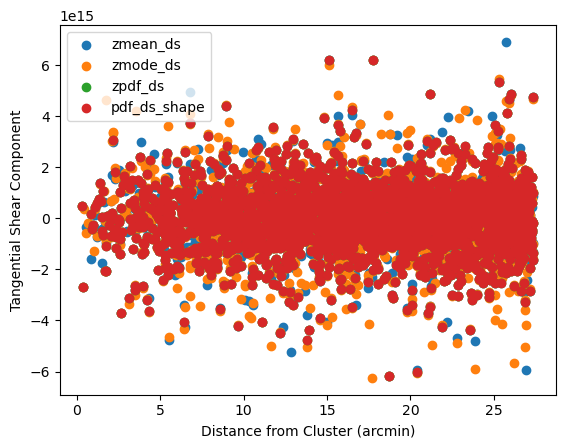

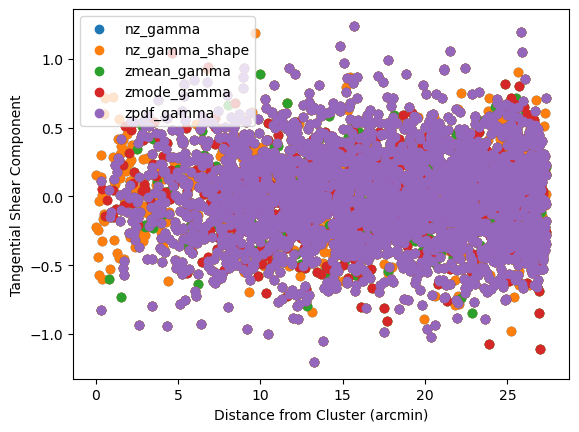

In [13]:
bg_cat_list = [ccc.get_background_shear_catalog(0) for ccc in combined_list]
all_runs_names = [mean_ds, mode_ds, pdf_ds, pdf_ds_shape, nz_gamma, mean_gamma, mode_gamma, pdf_gamma]
labels = ['zmean_ds', 'zmode_ds', 'zpdf_ds', 'pdf_ds_shape', 'nz_gamma', 'nz_gamma_shape', 'zmean_gamma', 'zmode_gamma', 'zpdf_gamma']
for i,bg_cat in enumerate(bg_cat_list):
    plt.scatter(bg_cat['distance_arcmin'] ,bg_cat['tangential_comp'], label = labels[i])
    plt.ylabel('Tangential Shear Component')
    plt.xlabel('Distance from Cluster (arcmin)')
    plt.legend()
    if i == 3:
        plt.show()
plt.show()

odict_keys(['cluster_id', 'cluster_index', 'cross_comp', 'distance_arcmin', 'g1', 'g2', 'source_index', 'tangential_comp', 'weight', 'true_g1', 'true_g2'])


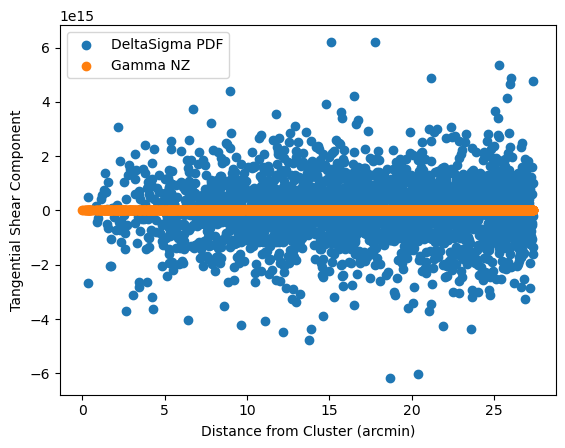

In [14]:
bg_cat_list = [ccc.get_background_shear_catalog(0) for ccc in combined_list]

bg_cat_ds_pdf = bg_cat_list[2]
bg_cat_gamma_nz = bg_cat_list[4]
print(bg_cat_ds_pdf[2].keys())
labels = ['zmean_ds', 'zmode_ds', 'zpdf_ds', 'zpdf_ds_shape', 'nz_gamma', 'nz_gamma_shape', 'zmean_gamma', 'zmode_gamma', 'zpdf_gamma']

plt.scatter(bg_cat_ds_pdf['distance_arcmin'] ,bg_cat_ds_pdf['tangential_comp'], label = 'DeltaSigma PDF')
plt.scatter(bg_cat_gamma_nz['distance_arcmin'] ,bg_cat_gamma_nz['tangential_comp'], label = 'Gamma NZ')
plt.ylabel('Tangential Shear Component')
plt.xlabel('Distance from Cluster (arcmin)')
plt.legend()
plt.show()

A also the shear catalog associated with that cluster, again by index, in the CLMM data format:

## Binning Cluster Catalog

In [15]:
print("Options for this pipeline and their defaults:")
print(txpipe.extensions.CLClusterBinningRedshiftRichness.config_options)
step3 = txpipe.extensions.CLClusterBinningRedshiftRichness.make_stage(
cluster_catalog="data/example/inputs/cluster_catalog.hdf5",
)
step3.run()
step3.finalize()
    

Options for this pipeline and their defaults:
{'zedge': [0.2, 0.4, 0.6, 0.8, 1.0], 'richedge': [5.0, 10.0, 20.0], 'initial_size': 100000, 'chunk_rows': 100000}


## Making the Ensemble Profile

In [16]:
print("Options for this pipeline and their defaults:")
print(txpipe.extensions.CLClusterEnsembleProfiles.config_options)
def run_different_options_ensemble(delta_sigma, name):
    print(name)
    step3 = txpipe.extensions.CLClusterEnsembleProfiles.make_stage(
        shear_catalog="data/example/inputs/metadetect_shear_catalog.hdf5",
        fiducial_cosmology="./data/fiducial_cosmology.yml",
        output_dir="data/example/outputs_shear_catalogs/ensemble_profiles/",
        cluster_shear_catalogs=name,
        cluster_catalog_tomography = "cluster_catalog_tomography.hdf5",
        #config="examples/metadetect/config.yml",  
        #max_radius=10.0,
        cluster_profiles = f'cluster_profiles_{name}.pkl',
    )
    step3.run()
    step3.finalize()
    final_name = f"cluster_profiles_{name}.pkl"
    return final_name
    

Options for this pipeline and their defaults:
{'r_min': 0.2, 'r_max': 3.0, 'nbins': 5, 'angle_arcmin_min': 25.0, 'angle_arcmin_max': 45.0, 'delta_sigma_profile': True, 'shear_profile': False, 'magnification_profile': False}


In [17]:
test_ensemble = [run_different_options_ensemble(None, run) for run in all_runs_names]

my_cluster_shear_catalog_mean_ds.hdf5
[0.2        0.34375439 0.59083539 1.01551128 1.74543228 3.        ]
221371 221371 221371
celestial
bin_zbin_0_richbin_0 <HDF5 group "/cluster_bin/bin_zbin_0_richbin_0" (8 members)> {'rich_max': 10.0, 'rich_min': 5.0, 'z_max': 0.4, 'z_min': 0.2} 5         ra                 dec         ...      richness        id  
------------------ ------------------- ... ----------------- -------
 60.90715205643431  -30.24513872352905 ... 9.660612106323242 17462.0
60.745430693132285 -30.722831995395694 ... 6.640127182006836 30553.0
 60.13513592278265  -30.18630075837688 ... 6.533342361450195 32634.0
 60.65087062021594 -30.035446420971837 ... 6.716402053833008 25937.0
 60.32661050735002 -30.939506455543473 ... 6.350282669067383 26346.0
Ncluster 5
For cluster 17462.0 at z= 0.2546227276325226 with n_source =  6868 theta_max is 42.37073978575504  arcmin = 9.998979828146442 Mpc
GCMetaData([('coordinate_system', 'celestial'), ('cosmo', None)])


KeyError: 'w_l'

## SACC File


In [ ]:
print("Options for this pipeline and their defaults:")
print(txpipe.extensions.CLClusterSACC.config_options)
def run_different_options_sacc(delta_sigma, name):
    print(name)
    step5 = txpipe.extensions.CLClusterSACC.make_stage(
        cluster_profiles = name,
        survey_name = 'cosmodc2-1deg',
        area = 1.0,
    )
    step5.run()
    step5.finalize()
    final_name = f"my_cluster_shear_catalog_{name}.sacc"
    return final_name
    

In [ ]:
test_sacc = [run_different_options_sacc(None, bla) for bla in test_ensemble]